In [1]:
#Importing the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report

In [2]:
#Importing the datset
train_dataset = pd.read_csv('/content/drive/MyDrive/space_ship/train.csv')
test_dataset = pd.read_csv('/content/drive/MyDrive/space_ship/test-3.csv')
Y_test = pd.read_csv('/content/drive/MyDrive/space_ship/sample_submission.csv')

In [3]:
train_dataset.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
test_dataset.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [7]:
Y_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
 1   Transported  4277 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 37.7+ KB


In [8]:
Y_test.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [9]:
# Print missing values for object data types
print("Missing values in object columns:")
print(train_dataset.select_dtypes(include='object').isnull().sum())

# Print missing values for numeric data types
print("\nMissing values in numeric columns:")
print(train_dataset.select_dtypes(exclude='object').isnull().sum())

Missing values in object columns:
PassengerId      0
HomePlanet     201
CryoSleep      217
Cabin          199
Destination    182
VIP            203
Name           200
dtype: int64

Missing values in numeric columns:
Age             179
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64


In [10]:
# Assuming you have a DataFrame called 'df'
# Replace 'df' with the actual name of your DataFrame

# Print missing values for object data types
print("Missing values in object columns:")
print(test_dataset.select_dtypes(include='object').isnull().sum())

# Print missing values for numeric data types
print("\nMissing values in numeric columns:")
print(test_dataset.select_dtypes(exclude='object').isnull().sum())

Missing values in object columns:
PassengerId      0
HomePlanet      87
CryoSleep       93
Cabin          100
Destination     92
VIP             93
Name            94
dtype: int64

Missing values in numeric columns:
Age              91
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64


In [11]:
#We will be dropping Cabin and Name since those are unique values
#Cleaning Training dataset
#1.Dropping Cabin and Name
#2.RoomService, FoodCourt,Spa,VrDeck,shoppingMall are expenses so we can create seperate ttotal expenses and add them and convert iinto int
#3.Homeplanet is object datatype and there 293 missing values, we can impute those missing values with mode and categorically encode
#4.CryoSleep is object datatype and is binary class so we can put it as 0's and 1's
#5.Destinattion is of object datatype and we can fill the missing values with mode and categorically encode it
#6.Age is float can be converted to int later
#7.VIP binary class missing VALUES with mode and convert to 0's and 1's
#8.Transported is bool datatype , we can convert to 0's and 1's

Cleaning Test Data

In [12]:
from sklearn.preprocessing import LabelEncoder
train_dataset['TotalExpenses'] = train_dataset[['RoomService', 'FoodCourt', 'Spa', 'VRDeck', 'ShoppingMall']].sum(axis=1)
train_dataset['TotalExpenses'] = train_dataset['TotalExpenses'].astype(int)
# Calculate the mode of the 'HomePlanet' column
homeplanet_mode = train_dataset['HomePlanet'].mode()[0]
# Impute missing values with the mode
train_dataset['HomePlanet'].fillna(homeplanet_mode, inplace=True)
Destination_mode = train_dataset['Destination'].mode()[0]
# Impute missing values with the mode
train_dataset['Destination'].fillna(Destination_mode, inplace=True)
column_VIP = train_dataset['VIP'].mode()[0]
train_dataset['VIP'].fillna(column_VIP, inplace=True)
column_CS = train_dataset['CryoSleep'].mode()[0]
train_dataset['CryoSleep'].fillna(column_CS, inplace=True)

train_dataset['Age'].fillna(train_dataset['Age'].median(), inplace=True)

label_encoder = LabelEncoder()
# Encode 'Cryosleep' column
train_dataset['CryoSleep'] = label_encoder.fit_transform(train_dataset['CryoSleep'])
# Encode 'VIP' column
train_dataset['VIP'] = label_encoder.fit_transform(train_dataset['VIP'])
# Perform dummy encoding for 'Destination' and 'HomePlanet'
destination_dummies = pd.get_dummies(train_dataset['Destination'], prefix='Destination')
homeplanet_dummies = pd.get_dummies(train_dataset['HomePlanet'], prefix='HomePlanet')

# Concatenate the dummy columns with the original DataFrame
train_dataset = pd.concat([train_dataset, destination_dummies, homeplanet_dummies], axis=1)

# Drop the original 'Destination' and 'HomePlanet' columns as they are now encoded
train_dataset.drop(['Destination', 'HomePlanet'], axis=1, inplace=True)
columns_to_drop = ['RoomService', 'FoodCourt', 'Spa', 'VRDeck', 'ShoppingMall']
train_dataset.drop(columns=columns_to_drop, inplace=True)
train_dataset['Age'] = train_dataset['Age'].astype(int)
train_dataset['TotalExpenses'] = train_dataset['TotalExpenses'].astype(int)
train_dataset['Transported'] = train_dataset['Transported'].astype(int)

In [13]:
train_dataset.drop(['Name', 'Cabin'], axis=1, inplace=True)

In [14]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   PassengerId                8693 non-null   object
 1   CryoSleep                  8693 non-null   int64 
 2   Age                        8693 non-null   int64 
 3   VIP                        8693 non-null   int64 
 4   Transported                8693 non-null   int64 
 5   TotalExpenses              8693 non-null   int64 
 6   Destination_55 Cancri e    8693 non-null   uint8 
 7   Destination_PSO J318.5-22  8693 non-null   uint8 
 8   Destination_TRAPPIST-1e    8693 non-null   uint8 
 9   HomePlanet_Earth           8693 non-null   uint8 
 10  HomePlanet_Europa          8693 non-null   uint8 
 11  HomePlanet_Mars            8693 non-null   uint8 
dtypes: int64(5), object(1), uint8(6)
memory usage: 458.5+ KB


In [15]:
train_dataset.head()

,PassengerId,CryoSleep,Age,VIP,Transported,TotalExpenses,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,0001_01,0,39,0,0,0,0,0,1,0,1,0
1,0002_01,0,24,0,1,736,0,0,1,1,0,0
2,0003_01,0,58,1,0,10383,0,0,1,0,1,0
3,0003_02,0,33,0,0,5176,0,0,1,0,1,0
4,0004_01,0,16,0,1,1091,0,0,1,1,0,0


In [16]:
# Print missing values for object data types
print("Missing values in object columns:")
print(train_dataset.select_dtypes(include='object').isnull().sum())

# Print missing values for numeric data types
print("\nMissing values in numeric columns:")
print(train_dataset.select_dtypes(exclude='object').isnull().sum())

Missing values in object columns:
PassengerId    0
dtype: int64

Missing values in numeric columns:
CryoSleep                    0
Age                          0
VIP                          0
Transported                  0
TotalExpenses                0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
dtype: int64


Cleaninng test data

In [17]:

test_dataset['TotalExpenses'] = test_dataset[['RoomService', 'FoodCourt', 'Spa', 'VRDeck', 'ShoppingMall']].sum(axis=1)
test_dataset['TotalExpenses'] = test_dataset['TotalExpenses'].astype(int)
homeplanet_mode = test_dataset['HomePlanet'].mode()[0]
# Impute missing values with the mode
test_dataset['HomePlanet'].fillna(homeplanet_mode, inplace=True)
destination_mode = test_dataset['Destination'].mode()[0]
# Impute missing values with the mode
test_dataset['Destination'].fillna(destination_mode, inplace=True)
column_VIP = test_dataset['VIP'].mode()[0]
test_dataset['VIP'].fillna(column_VIP, inplace=True)

column_CS = test_dataset['CryoSleep'].mode()[0]
test_dataset['CryoSleep'].fillna(column_CS, inplace=True)

# Impute missing values in 'Age' with the median
test_dataset['Age'].fillna(test_dataset['Age'].median(), inplace=True)

# Label encode 'CryoSleep' and 'VIP' columns
label_encoder = LabelEncoder()
test_dataset['CryoSleep'] = label_encoder.fit_transform(test_dataset['CryoSleep'])
test_dataset['VIP'] = label_encoder.fit_transform(test_dataset['VIP'])

# Perform dummy encoding for 'Destination' and 'HomePlanet'
destination_dummies = pd.get_dummies(test_dataset['Destination'], prefix='Destination')
homeplanet_dummies = pd.get_dummies(test_dataset['HomePlanet'], prefix='HomePlanet')

# Concatenate the dummy columns with the original DataFrame
test_dataset = pd.concat([test_dataset, destination_dummies, homeplanet_dummies], axis=1)

# Drop the original 'Destination' and 'HomePlanet' columns as they are now encoded
test_dataset.drop(['Destination', 'HomePlanet'], axis=1, inplace=True)

# Drop specified columns
columns_to_drop = ['RoomService', 'FoodCourt', 'Spa', 'VRDeck', 'ShoppingMall']
test_dataset.drop(columns=columns_to_drop, inplace=True)

# Convert 'Age', 'TotalExpenses', and 'Transported' columns to int
test_dataset['Age'] = test_dataset['Age'].astype(int)
test_dataset['TotalExpenses'] = test_dataset['TotalExpenses'].astype(int)
test_dataset.drop(['Name', 'Cabin'], axis=1, inplace=True)


In [18]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   PassengerId                4277 non-null   object
 1   CryoSleep                  4277 non-null   int64 
 2   Age                        4277 non-null   int64 
 3   VIP                        4277 non-null   int64 
 4   TotalExpenses              4277 non-null   int64 
 5   Destination_55 Cancri e    4277 non-null   uint8 
 6   Destination_PSO J318.5-22  4277 non-null   uint8 
 7   Destination_TRAPPIST-1e    4277 non-null   uint8 
 8   HomePlanet_Earth           4277 non-null   uint8 
 9   HomePlanet_Europa          4277 non-null   uint8 
 10  HomePlanet_Mars            4277 non-null   uint8 
dtypes: int64(4), object(1), uint8(6)
memory usage: 192.3+ KB


In [19]:
test_dataset.head()

,PassengerId,CryoSleep,Age,VIP,TotalExpenses,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,0013_01,1,27,0,0,0,0,1,1,0,0
1,0018_01,0,19,0,2832,0,0,1,1,0,0
2,0019_01,1,31,0,0,1,0,0,0,1,0
3,0021_01,0,38,0,7418,0,0,1,0,1,0
4,0023_01,0,20,0,645,0,0,1,1,0,0


<ipython-input-20-e6ebe256465e>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(train_dataset.columns.drop(target), rotation=90)


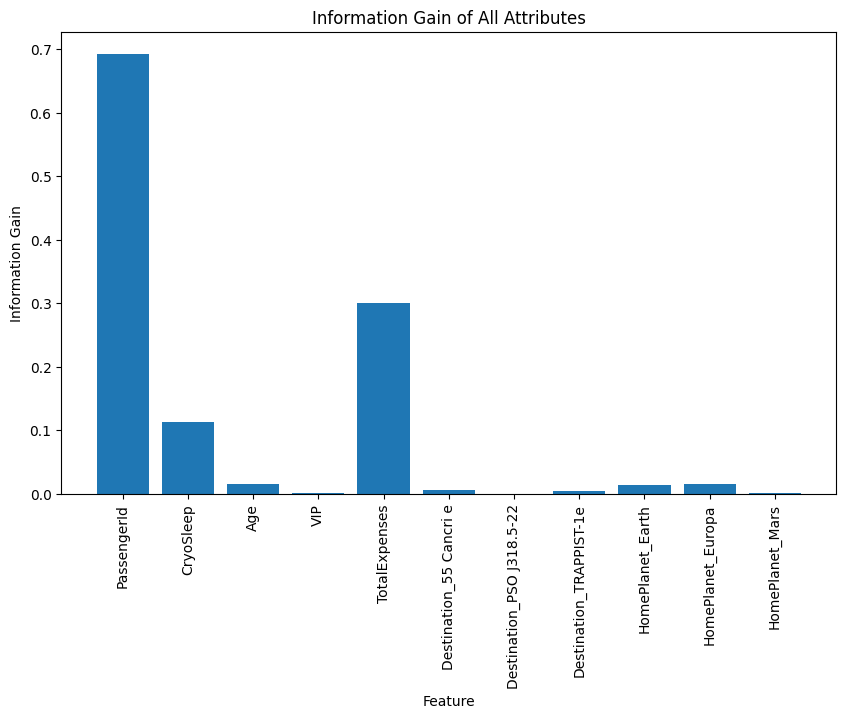

In [20]:
#INFORMATION GAIN CALCULATION: It helps determine the attribute that provides the most useful information for classification or prediction.
# Define your target variable
from sklearn.feature_selection import mutual_info_classif
target = 'Transported'

# Calculate the information gain for each feature
ig = mutual_info_classif(train_dataset.drop(target, axis=1), train_dataset[target], discrete_features=True)

# Create a bar plot of the information gain values
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(train_dataset.columns.drop(target), ig)
ax.set_xticklabels(train_dataset.columns.drop(target), rotation=90)
ax.set_xlabel('Feature')
ax.set_ylabel('Information Gain')
ax.set_title('Information Gain of All Attributes')
plt.show()

In [21]:
# Feature selection for test and training data
selected_features = ['CryoSleep', 'TotalExpenses', 'Age', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars','Destination_55 Cancri e','Destination_PSO J318.5-22','Destination_TRAPPIST-1e']
X_train = train_dataset[selected_features]
Y_train= train_dataset['Transported']
X_test = test_dataset[selected_features]
Y_test = Y_test['Transported']

In [22]:
#Building our Decision Tree Classifier model
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(random_state=0)
classifier_dt.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

In [23]:
#Applying K-fold Cross-validation
from sklearn.model_selection import cross_val_score
# Assuming 'classifier_dt' is your model and 'X_train_dt', 'Y_train_dt' are your training data
accuracies_dt = cross_val_score(estimator=classifier_dt, X=X_train, y=Y_train, cv=10)

print("Accuracy after K-fold Cross-validation: {:.2f} %".format(accuracies_dt.mean() * 100))
print("Standard Deviation: {:.2f} %".format(accuracies_dt.std() * 100))

Accuracy after K-fold Cross-validation: 66.81 %
Standard Deviation: 1.88 %


In [24]:
# Applying Grid Search to find the best model and the best parameters for Decision Tree Classifier
from sklearn.model_selection import GridSearchCV

parameters_dt = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30, 40, 50], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
grid_search_dt = GridSearchCV(estimator=classifier_dt,
                               param_grid=parameters_dt,
                               scoring='accuracy',
                               cv=10,
                               n_jobs=-1)
grid_search_dt.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [25]:
from sklearn.metrics import confusion_matrix, classification_report

# Get the best hyperparameters and best model
best_accuracy_dt = grid_search_dt.best_score_
best_parameters_dt = grid_search_dt.best_params_
best_model_dt = grid_search_dt.best_estimator_

# Predict the test set using the best model
Y_test_pred_dt = best_model_dt.predict(X_test)


Y_train_pred_dt = best_model_dt.predict(X_train)

# Make the confusion matrix and calculate accuracy
cm_test_dt = confusion_matrix(Y_test, Y_test_pred_dt)
cm_train_dt = confusion_matrix(Y_train, Y_train_pred_dt)

print("Best Accuracy: {:.2f} %".format(best_accuracy_dt * 100))
print("Best Parameters of the Random Forest Classifier model are:", best_parameters_dt)
print(f"Confusion matrix for test set: \n {cm_test_dt}")
print(f"Confusion matrix for train set: \n {cm_train_dt}")
print(f"The predicted test set is : \n {Y_test_pred_dt}")

Best Accuracy: 73.37 %
Best Parameters of the Random Forest Classifier model are: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Confusion matrix for test set: 
 [[2519 1758]
 [   0    0]]
Confusion matrix for train set: 
 [[3703  612]
 [1417 2961]]
The predicted test set is : 
 [1 0 1 ... 1 0 0]


In [27]:
# Classification reports for
report_train_dt = classification_report(Y_train, Y_train_pred_dt)
report_test_dt = classification_report(Y_test, Y_test_pred_dt)

print("Classification report for train set for Random Forest  Classifier  model: \n", report_train_dt)
print("Classification report for test set for Random Forest  Classifier model: \n", report_test_dt)

Classification report for train set for Random Forest  Classifier  model: 
               precision    recall  f1-score   support

           0       0.72      0.86      0.78      4315
           1       0.83      0.68      0.74      4378

    accuracy                           0.77      8693
   macro avg       0.78      0.77      0.76      8693
weighted avg       0.78      0.77      0.76      8693

Classification report for test set for Random Forest  Classifier model: 
               precision    recall  f1-score   support

           0       1.00      0.59      0.74      4277
           1       0.00      0.00      0.00         0

    accuracy                           0.59      4277
   macro avg       0.50      0.29      0.37      4277
weighted avg       1.00      0.59      0.74      4277



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
